# Importing Libraries and Modules

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [159]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EDA

In [4]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns in the dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are no null values values in the dataet except for _c39 column. But we still need to dig deeper.
There are int, object and float data type in the datset.
Our target variable is fraud_reported.

In [19]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

There are 178 null values in collision_type

In [20]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

There are 360 null values in property_damage

In [22]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

There are 343 null values in police_report_available

In [6]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique classes in our target variable

In [7]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We have 247 values under Y and 753 values under N. Therefore the class is imbalanced, we will balance it later

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
#Observation:

#1. No null values

# Univariate Analysis

In [9]:
df_numerical=df[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']]

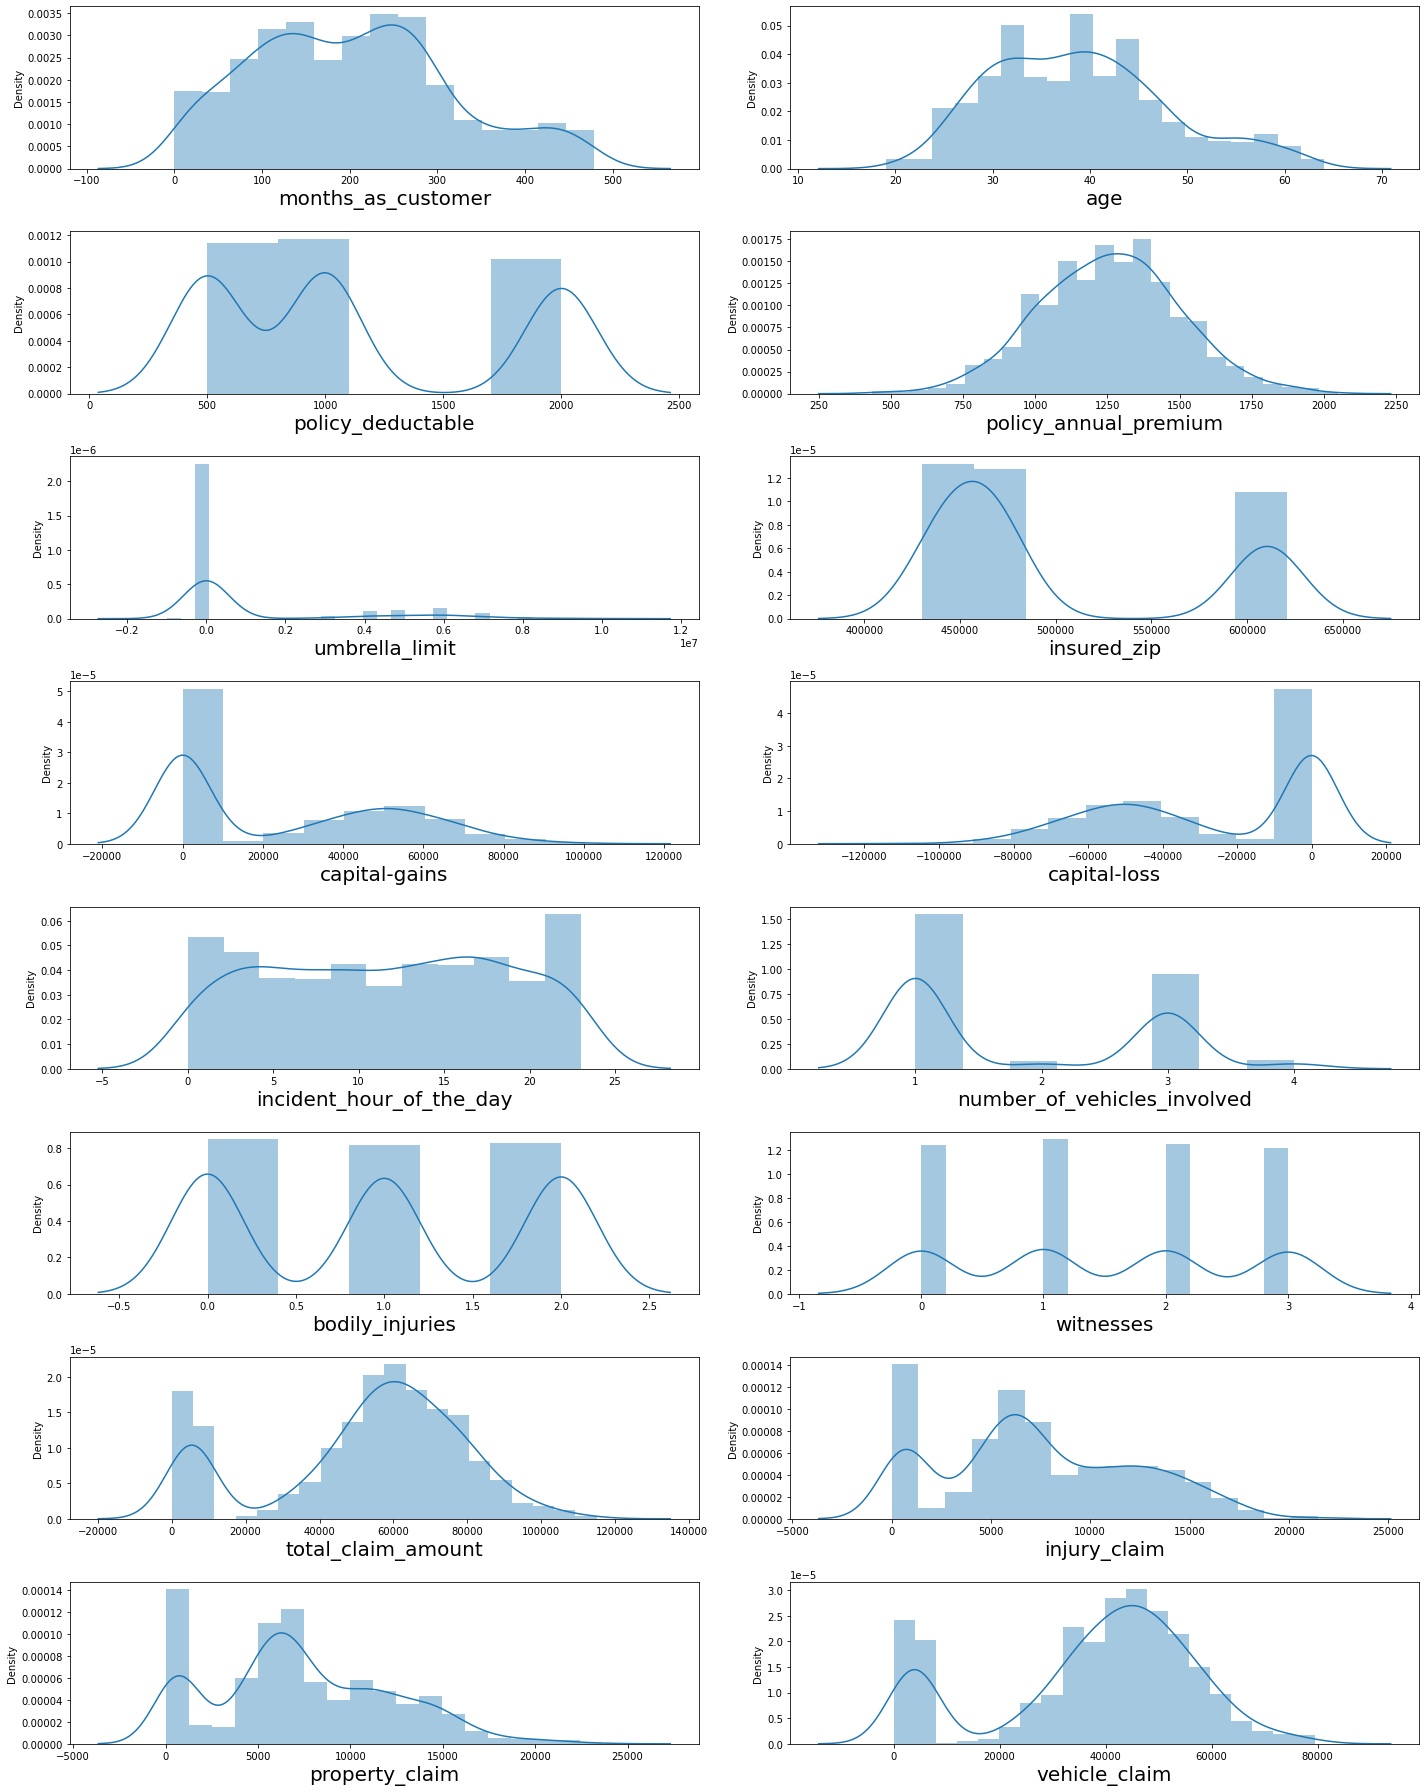

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

umbrella_limit, insured_zip, capital-gains, capital-loss, total_claim_amount looks skewed

<AxesSubplot:xlabel='policy_state', ylabel='count'>

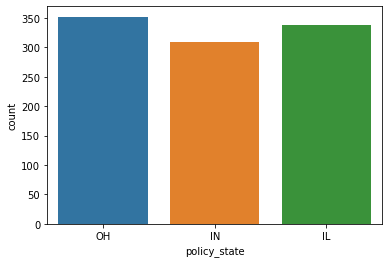

In [14]:
sns.countplot(df['policy_state'])

OH does the most policy insurance

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

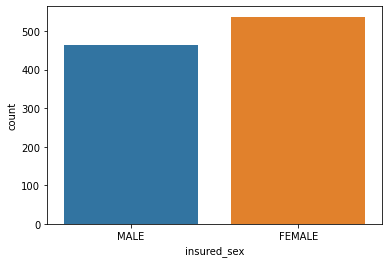

In [15]:
sns.countplot(df['insured_sex'])

Females do more policy than the males

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

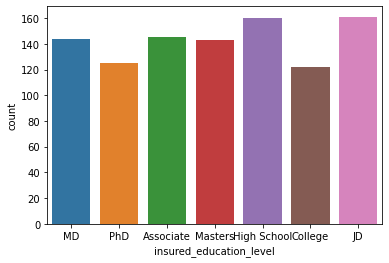

In [16]:
sns.countplot(df['insured_education_level'])

High School graduates does more policy

<AxesSubplot:xlabel='collision_type', ylabel='count'>

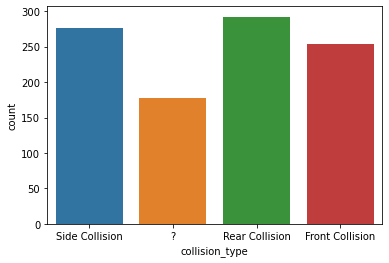

In [18]:
sns.countplot(df['collision_type'])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

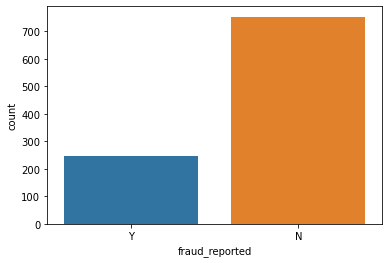

In [23]:
sns.countplot(df['fraud_reported'])

247 frauds were reported and 753 were not fraud

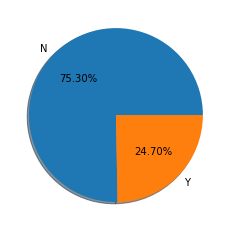

In [27]:
labels='N','Y'

fig,ax=plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

25% of frauds were reported

# Bivariate Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

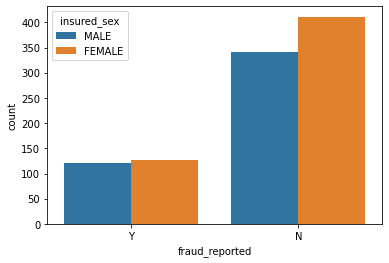

In [32]:
sns.countplot(x='fraud_reported',hue='insured_sex',data=df)

Females have done more fraud than male

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

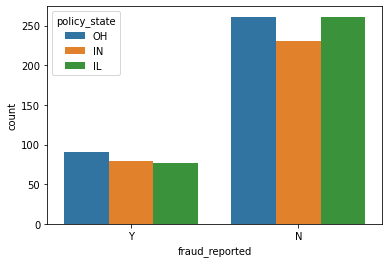

In [33]:
sns.countplot(x='fraud_reported',hue='policy_state',data=df)

OH state has reported the most frauds

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

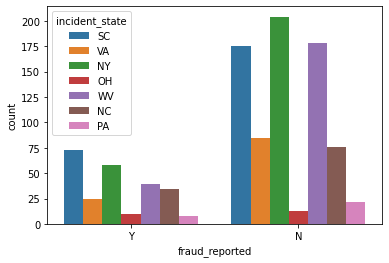

In [36]:
sns.countplot(x='fraud_reported',hue='incident_state',data=df)

SC state has reported most frauds

# Preprocessing

In [160]:
df.drop(columns=['_c39'],axis=1,inplace=True)

Dropping since it has all null values

## Replacing null values

In [161]:
df['collision_type']=df['collision_type'].replace('?',df['collision_type'].mode()[0])

In [162]:
df['property_damage']=df['property_damage'].replace('?',np.nan)

In [163]:
df['police_report_available']=df['police_report_available'].replace('?',np.nan)

In [164]:
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [165]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [46]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We see we have replaced all null values

## Extracting day and month from Date column

In [166]:
df['policy_day']=pd.to_datetime(df["policy_bind_date"]).dt.day

In [167]:
df['policy_month']=pd.to_datetime(df["policy_bind_date"]).dt.month

In [168]:
df.drop(columns=['policy_bind_date'],axis=1,inplace=True)

Dropping the original column since it is of no use

In [169]:
df['incident_day']=pd.to_datetime(df["incident_date"]).dt.day
df['incident_month']=pd.to_datetime(df["incident_date"]).dt.month

In [170]:
df.drop(columns=['incident_date','incident_location','policy_number'],axis=1,inplace=True)

Dropping the original column since it is of no use

## Encoding

In [171]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['policy_state'])
df2=lab_enc.fit_transform(df['policy_csl'])
df3=lab_enc.fit_transform(df['insured_sex'])
df4=lab_enc.fit_transform(df['insured_education_level'])
df5=lab_enc.fit_transform(df['insured_occupation'])
df6=lab_enc.fit_transform(df['insured_hobbies'])
df7=lab_enc.fit_transform(df['insured_relationship'])
df8=lab_enc.fit_transform(df['incident_type'])
df9=lab_enc.fit_transform(df['collision_type'])
df10=lab_enc.fit_transform(df['incident_severity'])
df11=lab_enc.fit_transform(df['authorities_contacted'])
df12=lab_enc.fit_transform(df['incident_state'])
df13=lab_enc.fit_transform(df['incident_city'])
df14=lab_enc.fit_transform(df['property_damage'])
df15=lab_enc.fit_transform(df['police_report_available'])
df16=lab_enc.fit_transform(df['auto_make'])
df17=lab_enc.fit_transform(df['auto_model'])
df18=lab_enc.fit_transform(df['fraud_reported'])

df['policy_state']=df1
df['policy_csl']=df2
df['insured_sex']=df3
df['insured_education_level']=df4
df['insured_occupation']=df5
df['insured_hobbies']=df6
df['insured_relationship']=df7
df['incident_type']=df8
df['collision_type']=df9
df['incident_severity']=df10
df['authorities_contacted']=df11
df['incident_state']=df12
df['incident_city']=df13
df['property_damage']=df14
df['police_report_available']=df15
df['auto_make']=df16
df['auto_model']=df17
df['fraud_reported']=df18

# Multivariate Analysis

In [53]:
corr=df.corr()
corr.shape

(39, 39)

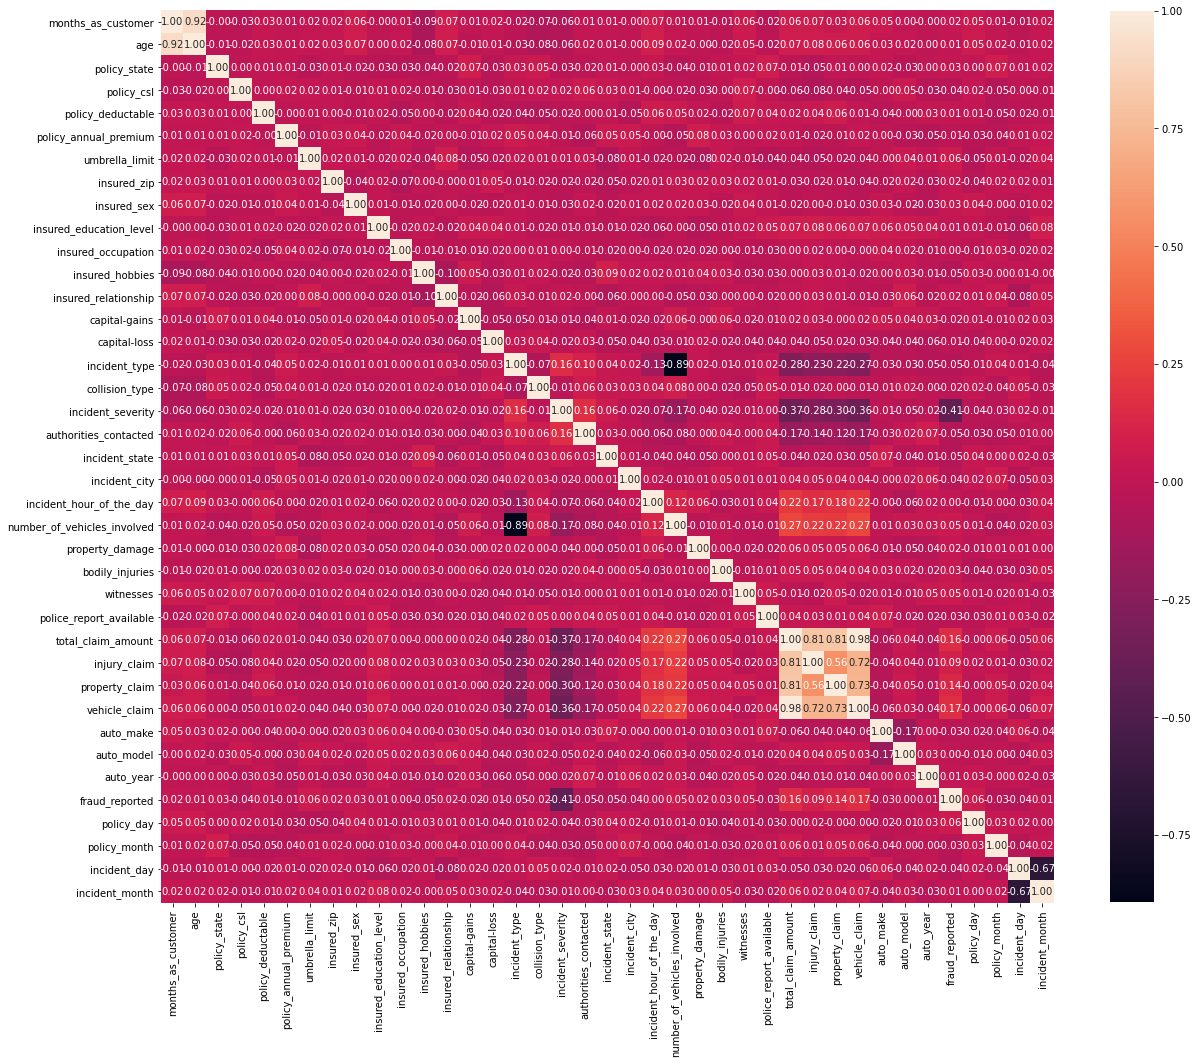

In [54]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We see a high correlation between age and months_as_customer, vehicle_claim and total_claim_amount

# Finding Outliers

In [55]:
df_outliers=df[['months_as_customer','age','policy_day','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_day','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']]

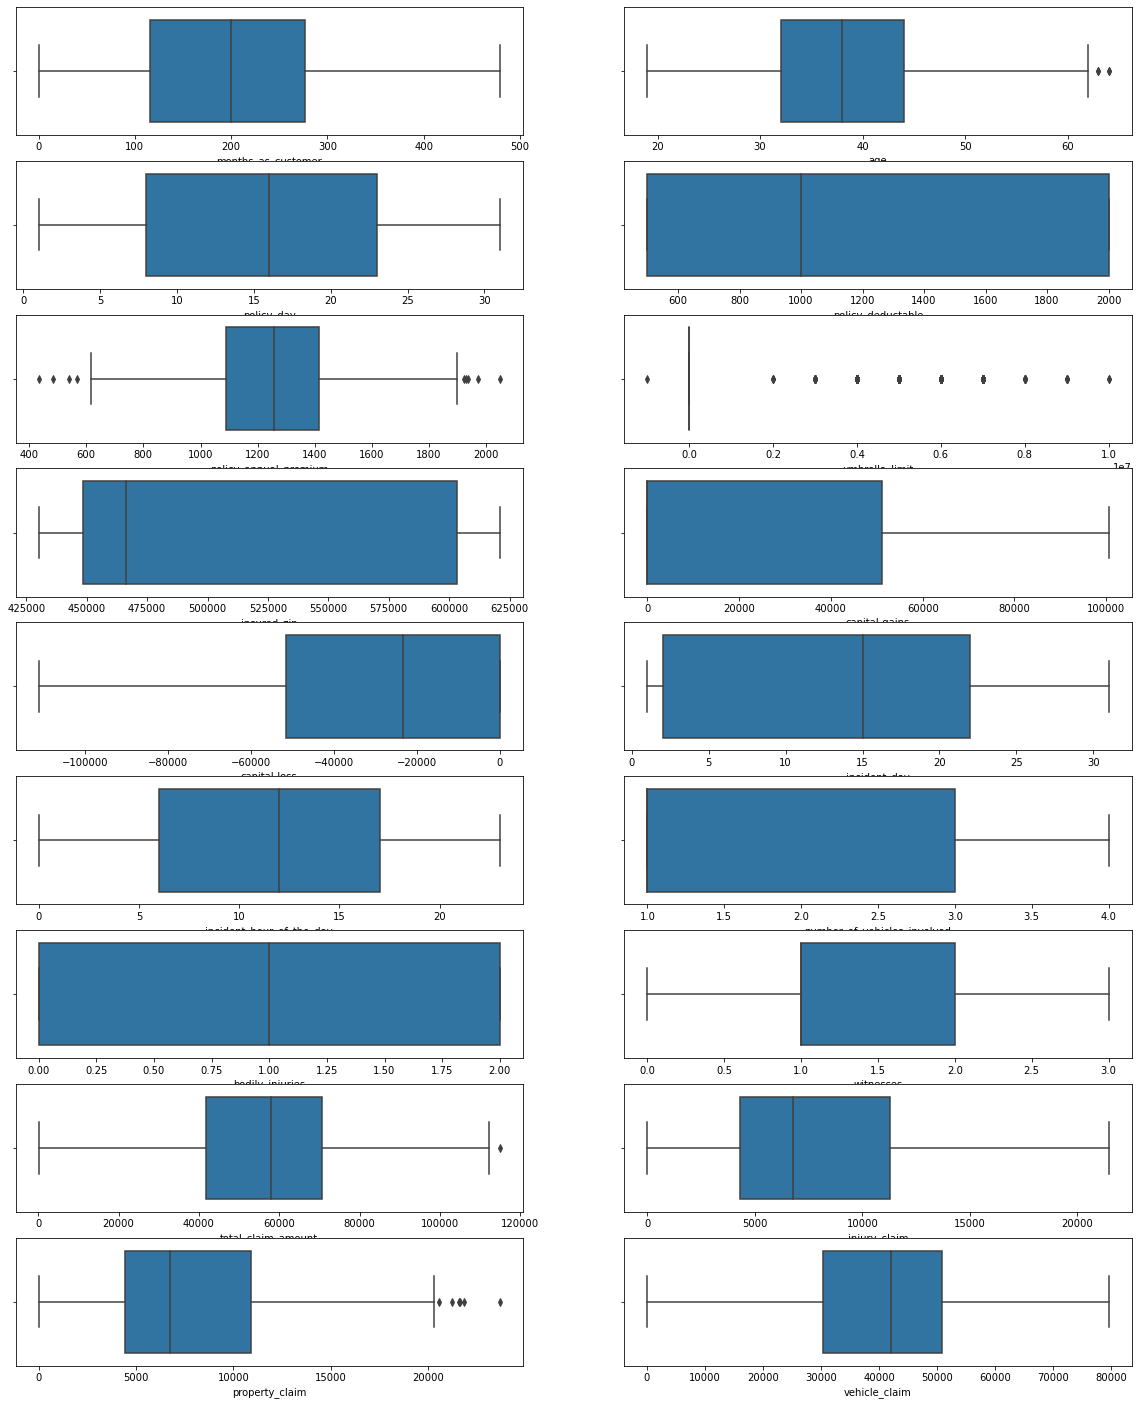

In [18]:
plt.figure(figsize=(20,25))
graph=1

for column in df_outliers:
    if(graph<=18):
        ax=plt.subplot(9,2,graph)
        sns.boxplot(df_outliers[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We see outliers in age,policy_annual_premium,umbrella_limit, total_claim_amount, property_claim

## Removing Outliers

In [172]:
from scipy.stats import zscore

z_score=zscore(df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_day,policy_month,incident_day,incident_month
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,204.594292,38.972477,1.020387,0.945973,1138.124363,1257.298359,9.908257e+05,500596.322120,0.464832,2.959225,...,7391.182467,37892.130479,6.563710,19.235474,2005.123344,0.244648,15.471967,6.553517,13.088685,3.393476
std,115.362802,9.179406,0.830289,0.804412,611.567198,241.462236,2.120098e+06,71369.824051,0.499016,1.953116,...,4793.177084,18839.979463,4.030657,11.136290,6.019871,0.430098,8.829246,3.401146,10.420314,3.265797
min,0.000000,19.000000,0.000000,0.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,116.000000,32.000000,0.000000,0.000000,500.000000,1088.340000,0.000000e+00,448436.000000,0.000000,1.000000,...,4490.000000,30240.000000,3.000000,10.000000,2000.000000,0.000000,8.000000,4.000000,2.000000,1.000000
50%,200.000000,38.000000,1.000000,1.000000,1000.000000,1257.360000,0.000000e+00,466390.000000,0.000000,3.000000,...,6750.000000,42080.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,15.000000,2.000000
75%,278.000000,44.000000,2.000000,2.000000,2000.000000,1415.740000,0.000000e+00,602942.000000,1.000000,5.000000,...,10860.000000,50720.000000,10.000000,29.000000,2010.000000,0.000000,23.000000,9.000000,22.000000,5.000000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,1969.630000,7.000000e+06,620962.000000,1.000000,6.000000,...,21810.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,31.000000,12.000000


In [122]:
df.shape

(981, 39)

In [123]:
(1000-981)/1000*100

1.9

We have lost less than 2% data

## Finding Skewness

In [173]:
df_outliers.skew()

months_as_customer             0.362177
age                            0.478988
policy_day                     0.024372
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_day                   0.059111
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

I am not removing the skewness since my skewness gets more increased rather than diminishing

## Separating the data into features and target

In [175]:
X=df.drop(columns=['fraud_reported'],axis=1)
y=df['fraud_reported']

In [176]:
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

In [177]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

The class in now balanced

In [178]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,7.541003e+00,months_as_customer
1,7.540818e+00,age
2,1.075355e+00,policy_state
3,1.079421e+00,policy_csl
4,1.057330e+00,policy_deductable
5,1.048863e+00,policy_annual_premium
6,1.068644e+00,umbrella_limit
7,1.059594e+00,insured_zip
8,1.084841e+00,insured_sex
9,1.049804e+00,insured_education_level


Age is collinear with months_as_customer, so dropping age column

In [179]:
X.drop(columns=['age'],axis=1,inplace=True)

In [180]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.063635e+00,months_as_customer
1,1.074875e+00,policy_state
2,1.078761e+00,policy_csl
3,1.057102e+00,policy_deductable
4,1.046781e+00,policy_annual_premium
5,1.066526e+00,umbrella_limit
6,1.056653e+00,insured_zip
7,1.084055e+00,insured_sex
8,1.049678e+00,insured_education_level
9,1.049241e+00,insured_occupation


total_claim_amount is highly correlated with injury_claim, so dropping one of them

In [181]:
X.drop(columns=['total_claim_amount'],axis=1,inplace=True)

In [182]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.063565,months_as_customer
1,1.070380,policy_state
2,1.066188,policy_csl
3,1.056914,policy_deductable
4,1.046536,policy_annual_premium
5,1.066486,umbrella_limit
6,1.056393,insured_zip
7,1.071964,insured_sex
8,1.048174,insured_education_level
9,1.049120,insured_occupation


No collinearity issue

# Model Training

## Finding the best random state

In [183]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8517520215633423 on Random State 44


In [184]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=44)

Splitting the data into train set and test set

### Checking the accuracy by using different models

In [36]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       179
           1       0.87      0.82      0.85       191

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



The accuracy of Decision Tree Classifier is 85%

In [37]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       179
           1       0.92      0.86      0.89       191

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



The accuracy of Random Forest Classifier is 89%

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       179
           1       0.91      0.89      0.90       191

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



The accuracy of Gradient Boosting Classifier is 90%

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58       179
           1       0.64      0.97      0.77       191

    accuracy                           0.71       370
   macro avg       0.79      0.70      0.68       370
weighted avg       0.78      0.71      0.68       370



The accuracy of KNeighborsClassifier is 71%

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.7972972972972973


In [46]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.8722972972972972


In [49]:
print(cross_val_score(gbc,X_scaler,y,cv=5).mean())

0.8635135135135135


In [54]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.6885135135135135


The difference between Accuracy and Cross validation is the least in RFC and Knn but F1 score is high for RFC, so RFC is our best model

## Hyperparameter Tuning

In [185]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [186]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [187]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [188]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 700}

In [189]:
Final_model=RandomForestClassifier(n_estimators=700,max_features='log2',criterion='entropy',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 88.14016172506739


The Accuracy after Hyperparameter tuning is 88%

## Plotting AUC ROC Curve

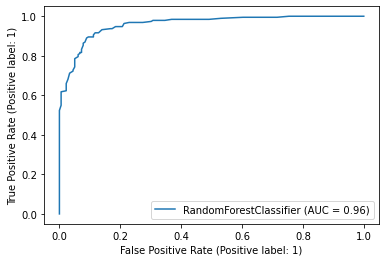

In [52]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

The AUC score is 0.96

## Confusion matrix

In [38]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[164,  15],
       [ 21, 170]], dtype=int64)

In [190]:
(21+15)/(164+15+21+170)*100

9.72972972972973

Our model predicts around 9.7% data wrong

## Saving the model

In [191]:
import joblib
joblib.dump(Final_model,"FinalModelInsurance.pkl")

['FinalModelInsurance.pkl']